In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
fr = open('D:\学习\集思项目\Homework 2\LES.txt')
fr = fr.readlines()
len(fr)

52

In [3]:
def txt2matrix(Filename):
    fr = open(Filename)
    fr = fr.readlines()
    num_rows = len(fr)
    num_columns = len(fr[0].split())
    out_matrix = np.zeros((num_rows-1, num_columns))
    for i in range(1,num_rows):
        out_matrix[i-1,:] = fr[i].split()
    return out_matrix

data = txt2matrix('D:\学习\集思项目\Homework 2\LES.txt')

In [4]:
X = data[:,0:1]
Y = data[:,1:2]
Y1 = data[:,2:3]
Y2 = data[:,3:]

# Answer for Question 1

# 1、For Y

In [5]:
# Using Gradient Descent Linear Regression
alpha = 0.0001
theta_hat = np.ones((2,1))

In [6]:
def calculate_J(X,Y,H,theta):
    m = len(X)
    Y_hat = H.dot(theta)
    J = (Y_hat - Y).T.dot(Y_hat - Y) / (2 * m)
    return J

In [7]:
def diff_J(X,Y,H,theta):
    m = len(X)
    n = len(theta)
    diff_J = np.zeros((n,1))
    for i in range(n):
        diff_J[i] = np.sum((H.dot(theta) - Y) * H[:,i:i+1]) / m
    return diff_J

In [8]:
time_start = time.time()

alpha = 0.0001
H = np.column_stack((X, np.ones(51)))
theta_hat_2 = theta_hat - alpha * diff_J(X,Y,H,theta_hat)
diff = calculate_J(X,Y,H,theta_hat) - calculate_J(X,Y,H,theta_hat_2)
while (diff > 0.000001):
    theta_hat = theta_hat_2
    theta_hat_2 = theta_hat - alpha * diff_J(X,Y,H,theta_hat)
    diff = calculate_J(X,Y,H,theta_hat) - calculate_J(X,Y,H,theta_hat_2)
    
time_end = time.time()
time_c= time_end - time_start   #运行所花时间
print('time cost', time_c, 's')

time cost 1.4388728141784668 s


theta_hat is 
 [[2.93057793]
 [2.59883486]]


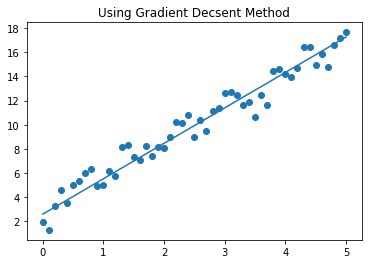

In [9]:
prediction_Y = H.dot(theta_hat)
plt.scatter(X, Y, label = 'Raw Data')
plt.plot(X, prediction_Y)
plt.title('Using Gradient Decsent Method')
print("theta_hat is \n",theta_hat)

theta_hat is 
 [[2.80674245]
 [3.00405741]]


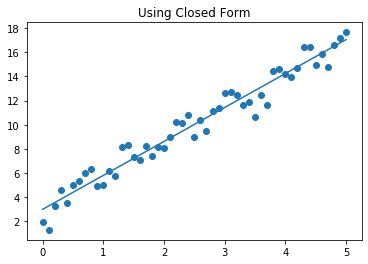

In [10]:
H = np.column_stack((X, np.ones(51)))
theta_hat = np.linalg.inv(H.T.dot(H)).dot(H.T).dot(Y)
prediction_Y = H.dot(theta_hat)
plt.scatter(X, Y, label = 'Raw Data')
plt.plot(X, prediction_Y)
plt.title('Using Closed Form')
print("theta_hat is \n",theta_hat)

# 2、For Y1

In [11]:
time_start = time.time()

alpha = 0.0001
theta1_hat = np.ones((3,1))
H1 = np.column_stack((X ** 2, X, np.ones(51)))


theta1_hat_2 = theta1_hat - alpha * diff_J(X,Y1,H1,theta1_hat)
diff = calculate_J(X,Y1,H1,theta1_hat) - calculate_J(X,Y1,H1,theta1_hat_2)
while (diff > 0.000001):
    theta1_hat = theta1_hat_2
    theta1_hat_2 = theta1_hat - alpha * diff_J(X,Y1,H1,theta1_hat)
    diff = calculate_J(X,Y1,H1,theta1_hat) - calculate_J(X,Y1,H1,theta1_hat_2)
    
time_end = time.time()
time_c= time_end - time_start   #运行所花时间
print('time cost', time_c, 's')

time cost 1.296177864074707 s


theta_hat is 
 [[1.05279118]
 [2.71428695]
 [2.65294595]]


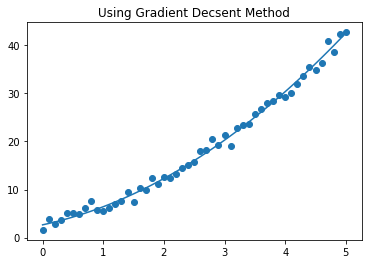

In [12]:
prediction_Y1 = H1.dot(theta1_hat)
plt.scatter(X, Y1, label = 'Raw Data')
plt.plot(X, prediction_Y1)
plt.title('Using Gradient Decsent Method')
print("theta_hat is \n",theta1_hat)

theta1_hat is 
 [[1.05579723]
 [2.63511396]
 [2.90445558]]


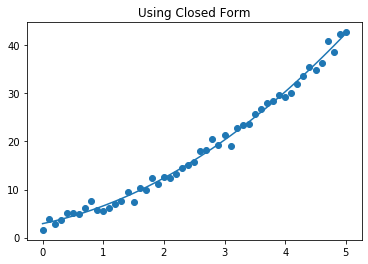

In [13]:
theta1_hat = np.linalg.inv(H1.T.dot(H1)).dot(H1.T).dot(Y1)
prediction_Y1 = H1.dot(theta1_hat)
plt.scatter(X, Y1, label = 'Raw Data')
plt.plot(X, prediction_Y1)
plt.title('Using Closed Form')
print("theta1_hat is \n",theta1_hat)

# 3、For Y2

In [14]:
def calculate_J(X,Y,theta):
    m = len(X)
    Y_hat = np.zeros((m,1))
    for i in range(m):
        Y_hat[i] = theta[0] * np.exp(theta[1] * X[i])
    J = (Y_hat - Y).T.dot(Y_hat - Y) / (2 * m)
    return J

In [15]:
def diff_J(X,Y,theta):
    m = len(X)
    n = len(theta)
    
    Y_hat = np.zeros((m,1))
    for i in range(m):
        Y_hat[i] = theta[0] * np.exp(theta[1] * X[i])
        
    diff_J = np.zeros((n,1))
    diff_J[0] = np.sum((Y_hat - Y) * np.exp(theta[1] * X)) / m
    diff_J[1] = np.sum((Y_hat - Y) * X * theta[0] * np.exp(theta[1] * X)) / m
    
    return diff_J


In [16]:
time_start = time.time()

alpha = 0.00001
theta2_hat = np.ones((2,1))


theta2_hat_2 = theta2_hat - alpha * diff_J(X,Y2,theta2_hat)
diff = calculate_J(X,Y2,theta2_hat) - calculate_J(X,Y2,theta2_hat_2)
while (diff > 0.000001):
    theta2_hat = theta2_hat_2
    theta2_hat_2 = theta2_hat - alpha * diff_J(X,Y2,theta2_hat)
    diff = calculate_J(X,Y2,theta2_hat) - calculate_J(X,Y2,theta2_hat_2)
    
time_end = time.time()
time_c= time_end - time_start   #运行所花时间
print('time cost', time_c, 's')

time cost 63.35401678085327 s


theta2_hat is 
 [[5.54904567]
 [0.4854753 ]]


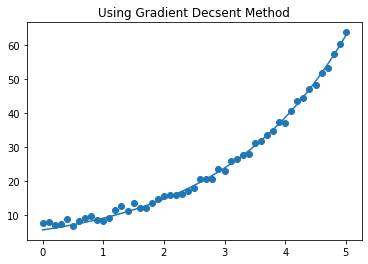

In [17]:
prediction_Y2 = np.zeros(51)

for i in range(51):
    prediction_Y2[i] = theta2_hat[0] * np.exp(theta2_hat[1] * X[i])
plt.scatter(X, Y2, label = 'Raw Data')
plt.plot(X, prediction_Y2)
plt.title('Using Gradient Decsent Method')

print("theta2_hat is \n",theta2_hat)

time cost 0.0 s

theta2_hat is 
 [[5.78913267]
 [0.47553971]]


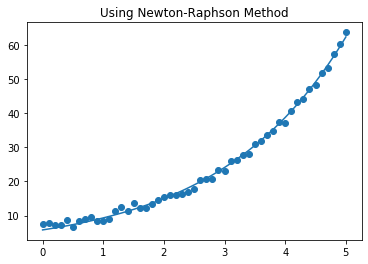

In [18]:
time_start = time.time()

theta2_hat = np.ones((2,1))
H2 = np.zeros((51,2))
W = np.identity(51)
delta_Z = np.ones((51,1))
delta_theta2_hat = np.ones((2,1))

while (delta_theta2_hat[0] > 0.000001 or delta_theta2_hat[1] > 0.000001):
    for i in range(51):
        delta_Z[i] = Y2[i] - theta2_hat[0] * np.exp(theta2_hat[1] * X[i])
        H2[i,0] = np.exp(theta2_hat[1] * X[i])
        H2[i,1] = theta2_hat[0] * X[i] * np.exp(theta2_hat[1] * X[i])
    delta_theta2_hat = np.linalg.inv(H2.T.dot(W.dot(H2))).dot(H2.T.dot(W.dot(delta_Z)))
    theta2_hat = theta2_hat + delta_theta2_hat

time_end = time.time()
time_c= time_end - time_start   #运行所花时间
print('time cost', time_c, 's\n')
    
prediction_Y2 = np.zeros(51)

for i in range(51):
    prediction_Y2[i] = theta2_hat[0] * np.exp(theta2_hat[1] * X[i])
plt.scatter(X, Y2, label = 'Raw Data')
plt.plot(X, prediction_Y2)
plt.title('Using Newton-Raphson Method')

print("theta2_hat is \n",theta2_hat)

In terms of the results of program, closed form is preferable in this cases. Because Gradient Descent Method cost much more time.

# Answer for Question 2

In [19]:
def createDataSet():
    
    TrainingdataSet = [
        # 1
        ['乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 0.774, 0.376, '好瓜'],
        # 2
        ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.634, 0.264, '好瓜'],
        # 3
        ['青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 0.608, 0.318, '好瓜'],
        # 4
        ['浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.556, 0.215, '好瓜'],
        # 5
        ['青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 0.403, 0.237, '好瓜'],
        # 6
        ['乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘', 0.481, 0.149, '好瓜'],
        # 7
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑', 0.437, 0.211, '好瓜'],
        # ----------------------------------------------------
        # 8
        ['乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑', 0.666, 0.091, '坏瓜'],
        # 9
        ['青绿', '硬挺', '清脆', '清晰', '平坦', '软粘', 0.243, 0.267, '坏瓜'],
        # 10
        ['青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑', 0.639, 0.161, '坏瓜'],
        # 11
        ['浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑', 0.657, 0.198, '坏瓜'],
        # 12
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 0.360, 0.370, '坏瓜'],
        # 13
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑', 0.593, 0.042, '坏瓜'],
        # 14
        ['青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑', 0.719, 0.103, '坏瓜']
    ]
    
    TestdataSet = [
        # 1
        ['浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑', 0.245, 0.057, '坏瓜'],
        # 2
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘', 0.343, 0.099, '坏瓜'],
        # 3
        ['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.697, 0.460, '好瓜'],
    ]
    
    
    labels = ['色泽', '根蒂', '敲击', '纹理', '脐部', '触感', '密度', '含糖率']
    
    labels_full = {}

    for i in range(len(labels)):
        labelList = [example[i] for example in TrainingdataSet]
        uniqueLabel = set(labelList)
        labels_full[labels[i]] = uniqueLabel

    return TrainingdataSet, TestdataSet, labels, labels_full

In [20]:
import collections
import operator

def majorityCnt(classList):
    
    classCount = collections.defaultdict(int)
    
    for vote in classList:
        classCount[vote] += 1
    
    sortedClassCount = sotred(classCount.items(), keys = operator.itemgetter(1), reverse = True)
    
    return sortedClassCount[0][0]

In [21]:
from math import log

def calcShannonEnt(dataSet):
    
    numEntries = len(dataSet)
    
    labelCounts = collections.defaultdict(int)
    
    for featVec in dataSet:
        currentLabel = featVec[-1]
        labelCounts[currentLabel] += 1
    
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob * log(prob,2)
    
    return shannonEnt

In [22]:
def splitDataSet(dataSet, axis, value):
    
    retDataSet = []
    
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis + 1:])
            retDataSet.append(reducedFeatVec)
    
    return retDataSet

In [23]:
def splitDataSetForSeries(dataSet, axis, value):
    
    eltDataSet = []
    
    gtDataSet = []
    
    for feat in dataSet:
        if feat[axis] <= value:
            eltDataSet.append(feat)
        else:
            gtDataSet.append(feat)

    return eltDataSet, gtDataSet

In [24]:
def calcInfoGain(dataSet, featList, i, baseEntropy):
    
    uniqueVals = set(featList)
    
    newEntropy = 0.0
    
    for value in uniqueVals:
        subDataSet = splitDataSet(dataSet = dataSet, axis = i, value = value)
        prob = len(subDataSet) / float(len(dataSet))
        newEntropy += prob * calcShannonEnt(subDataSet)
    
    infoGain = baseEntropy - newEntropy
    
    return infoGain

In [25]:
def calcInfoGainForSeries(dataSet, i, baseEntropy):
    
    maxInfoGain = 0.0
    bestMid = -1
    featList = [example[i] for example in dataSet]
    classList = [example[-1] for example in dataSet]
    dictList = dict(zip(featList, classList))
    
    sortedFeatList = sorted(dictList.items(), key = operator.itemgetter(0))
    numberForFeatList = len(sortedFeatList)
    midFeatList = [round((sortedFeatList[i][0] + sortedFeatList[i+1][0]) / 2.0, 3) for i in range(numberForFeatList - 1)]
    
    for mid in midFeatList:
        eltDataSet, gtDataSet = splitDataSetForSeries(dataSet, i, mid)
        newEntropy = len(eltDataSet) / len(sortedFeatList) * calcShannonEnt(eltDataSet) + len(gtDataSet) / len(sortedFeatList) * calcShannonEnt(gtDataSet)
        infoGain = baseEntropy - newEntropy
        if infoGain > maxInfoGain:
            bestMid = mid
            maxInfoGain = infoGain

    return maxInfoGain, bestMid

In [26]:
def chooseBestFeatureToSplit(dataSet, labels):
    
    numFeatures = len(dataSet[0]) - 1
    
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    flagSeries = 0
    bestSeriesMid = 0.0
    
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        if isinstance(featList[0], str):
            infoGain = calcInfoGain(dataSet, featList, i, baseEntropy)
        else:
            infoGain, bestMid = calcInfoGainForSeries(dataSet, i, baseEntropy)
        
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
            
            flagSeries = 0
            if not isinstance(dataSet[0][bestFeature], str):
                flagSeries = 1
                bestSeriesMid = bestMid
                
    if flagSeries:
        return bestFeature, bestSeriesMid
    else:
        return bestFeature

In [27]:
def createTree(dataSet, labels):
    
    classList = [example[-1] for example in dataSet]
    
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    
    bestFeat = chooseBestFeatureToSplit(dataSet = dataSet, labels = labels)
    
    bestFeatLabel = ''
    flagSeries = 0
    midSeries = 0.0
    
    if isinstance(bestFeat, tuple):
        bestFeatLabel = str(labels[bestFeat[0]]) + '小于' + str(bestFeat[1]) + '?'
        midSeries = bestFeat[1]
        bestFeat = bestFeat[0]
        flagSeries = 1
    else:
        bestFeatLabel = labels[bestFeat]
        flagSeries = 0
    
    myTree = {bestFeatLabel: {}}
    featValues = [example[bestFeat] for example in dataSet]
    
    if flagSeries:
        eltDataSet, gtDataSet = splitDataSetForSeries(dataSet, bestFeat, midSeries)
        subLabels = labels[:]
        subTree = createTree(eltDataSet, subLabels)
        myTree[bestFeatLabel]['小于'] = subTree

        subTree = createTree(gtDataSet, subLabels)
        myTree[bestFeatLabel]['大于'] = subTree

        return myTree
    else:
        del (labels[bestFeat])
        uniqueVals = set(featValues)
        for value in uniqueVals:
            subLabels = labels[:]
            subTree = createTree(splitDataSet(dataSet=dataSet, axis=bestFeat, value=value), subLabels)
            myTree[bestFeatLabel][value] = subTree
        return myTree

In [28]:
TrainingdataSet, TestdataSet, labels, labels_full = createDataSet()

myTree = createTree(TrainingdataSet, labels)
myTree

{'纹理': {'清晰': {'密度小于0.382?': {'小于': '坏瓜', '大于': '好瓜'}},
  '稍糊': {'触感': {'硬滑': '坏瓜', '软粘': '好瓜'}},
  '模糊': '坏瓜'}}

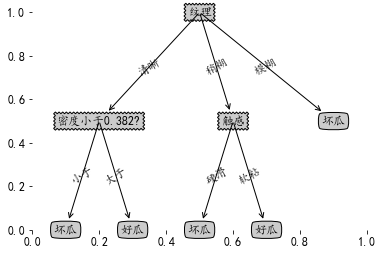

[['乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 0.774, 0.376, '好瓜'],
 ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.634, 0.264, '好瓜'],
 ['青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', 0.608, 0.318, '好瓜'],
 ['浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.556, 0.215, '好瓜'],
 ['青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 0.403, 0.237, '好瓜'],
 ['乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘', 0.481, 0.149, '好瓜'],
 ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑', 0.437, 0.211, '好瓜'],
 ['乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑', 0.666, 0.091, '坏瓜'],
 ['青绿', '硬挺', '清脆', '清晰', '平坦', '软粘', 0.243, 0.267, '坏瓜'],
 ['青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑', 0.639, 0.161, '坏瓜'],
 ['浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑', 0.657, 0.198, '坏瓜'],
 ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘', 0.36, 0.37, '坏瓜'],
 ['浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑', 0.593, 0.042, '坏瓜'],
 ['青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑', 0.719, 0.103, '坏瓜']]

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
mpl.rcParams['font.size'] = 12  # 字体大小
mpl.rcParams['axes.unicode_minus'] = False  # 正常显示负号

descisionNode = dict(boxstyle='sawtooth', fc='0.8')
leafNode = dict(boxstyle='round4', fc='0.8')
arrow_args = dict(arrowstyle= '<-')

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',
                             xytext=centerPt, textcoords='axes fraction',
                              va='center', ha='center', bbox=nodeType, arrowprops=arrow_args)

def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs


def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]  
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = {'xticks': None, 'yticks': None}
    createPlot.ax1 = plt.subplot(111, frameon=False)
    plotTree.totalW = float(getNumLeafs(inTree)) 
    plotTree.totalD = float(getTreeDepth(inTree))   
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()


def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, descisionNode)
    seconDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in seconDict.keys():
        if type(seconDict[key]).__name__ == 'dict':
            plotTree(seconDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(seconDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD


def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va='center', ha='center', rotation=30)

createPlot(myTree)
TrainingdataSet

In [30]:
TestdataSet

[['浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑', 0.245, 0.057, '坏瓜'],
 ['浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘', 0.343, 0.099, '坏瓜'],
 ['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', 0.697, 0.46, '好瓜']]